<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/1_Introduccion/Ejercicios/regresion_ls_ejercicios.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Prediciendo ventas de productos

En este ejercicio continuaremos viendo el dataset visto en la notebook anterior. Queremos predecir las ventas del producto y nuestro conjunto de datos tiene las ventas en 200 mercados, y el presupuesto dedicado en publicidad en 3 medios: TV, radio y diario.

Carguemos este dataset y algunas librerías:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns; sns.set()

In [36]:
df = pd.read_csv('../../data/advertising.csv')

In [37]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Como habiamos visto antes la relación parece ser lineal con la variable TV, es decir cuanta plata se invirtió ahí. Crear un `X` dataframe que tenga solo las variables TV, Radio y Newspaper, y crear una variable `y` que tenga solo el dato de las ventas.

In [38]:
# Completar
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [39]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

## Ejercicio 1 - Train Test Split

a) En este ejericio elaborar una separación de datos en entrenamiento, dejando un 25% de datos para prueba. Para eso utilicen `train_test_split` de Scikit-Learn basandose en el ejemplo presente en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), deberían crear una variable `X_train`, `X_test`, con los features, y con los targets `y_train`, e `y_test`. ¿Qué tamaño tiene cada conjunto? ¿El conjunto que crearon tiene el mismo orden de filas?


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

b) Quedarse solo con la columna que corresponde a TV, y ajustar un modelo de regresion lineal al conjunto de entrenamiento con intercept. Tambien construir una matriz que tenga solo la columna de TV en el conjunto de test. 

In [42]:
from sklearn.linear_model import LinearRegression

# Completar
X_train_tv = X_train[["TV"]]
X_test_tv  = X_test[["TV"]]

model = LinearRegression(fit_intercept=True)

In [43]:
type(X_train_tv), type(X_test_tv)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [44]:
model.fit(X_train_tv, y_train)

LinearRegression()

c) Ahora vamos a querer evaluar nuestro modelo en nuestro conjunto de testeo, para eso tenemos que calcular las predicciones del modelo $\hat{y}$, y para esto usamos el método `predict` sobre todo el conjunto de testeo.

`y_predicted = modelo.predict(X_test)`

Luego, usando los valores reales de `y` en el conjunto de test, nos interesa calcular el error de nuestro modelo en datos que no vio, justamente el conjunto de test. Para eso vamos a calcular uno de los errores más populares, el [Error Cuadrático Medio](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio):

$ ECM = \dfrac{1}{n} \sum (y_i - \hat{y}_i)^2$

Es decir que el ECM es el promedio de la diferencia entre los vectores `y_test` e `y_predict` elevadas al cuadrado. Calcular el ECM usando solo herramientas de `numpy`:

In [45]:
# Completar

# calculamos las predicciones sobre test
y_predict = model.predict(X_test_tv)

# calculamos el cuadrado de las diferencias de estos vectores
ecm = (y_test - y_predict) ** 2

# calculamos el promedio usando mean
print('El ECM fue de: ', ecm.mean())

El ECM fue de:  5.926211540707872


d) Podemos usar el ECM que nos brinda SkLearn: [RMS](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=rms). Calcularlo el ECM para cada conjunto, entrenamiento y testo. ¿En que conjunto rindió mejor nuestro modelo?

In [46]:
from sklearn.metrics import mean_squared_error

# Completar (debería dar lo mismo que el item anterior)
mean_squared_error(y_test, y_predict)

5.926211540707872

## Ejercicio 2 - Probando otras variables

Ajustar un modelo lineal para cada variable sobre el conjunto que entrenamiento y calcular el error sobre cada conjunto para cada modelo. Comparar el rendimiento de cada modelo en ambos conjuntos, ¿cuál fue el mejor modelo?. Por lo visto en clase, ¿era esperable este resultado?

In [56]:
from sklearn.metrics import mean_squared_error

# Completar

# sugerencia (pueden no usarla)
def regresion_ls(X_train:pd.DataFrame, 
                 X_test :pd.DataFrame,
                 y_train:pd.Series, 
                 y_test :pd.Series,
                 var: str):
  """
  Input
    X, y: Datos
    var: Nombre del feature a utilizar para ajustar un modelo de regresion simple
  Output
    El modelo y métrica
  """

  X_train_aux = X_train[[var]]
  X_test_aux  = X_test[[var]]

  modelo = LinearRegression(fit_intercept=True)
  modelo.fit(X_train_aux, y_train)
  
  metric_train = mean_squared_error(y_train, modelo.predict(X_train_aux))
  metric_test = mean_squared_error(y_test, modelo.predict(X_test_aux))

  print(f"Métrica de entrenamiento con {var}: {metric_train}")
  print(f"Métrica de test con {var}: {metric_test}")
  
  return modelo

print(df.columns)

for col in df.columns:
  if col != "Sales":
    print(col)
    resul = regresion_ls(X_train, X_test, y_train, y_test, col)
    #print(modelo)
    print("Intercepto:", resul.intercept_)
    print("Coeficiente:", resul.coef_)
    print("\n")


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
TV
Métrica de entrenamiento con TV: 4.995080179217276
Métrica de test con TV: 5.926211540707872
Intercepto: 7.110530139796396
Coeficiente: [0.0543416]


Radio
Métrica de entrenamiento con Radio: 25.417695629882697
Métrica de test con Radio: 22.229300185860275
Intercepto: 12.157592478872997
Coeficiente: [0.10925137]


Newspaper
Métrica de entrenamiento con Newspaper: 27.149031351662995
Métrica de test con Newspaper: 27.45004087119592
Intercepto: 13.509243619829705
Coeficiente: [0.04108513]




Claramente, el modelo con el menor margen de error fue el que tomó como variable independiente lo invertido en TV, como era esperable.

¿Cuál es el peso asignado a cada variable por nuestros modelos? ¿Utilizaría solo este dato para hacer una recomendación sobre donde invertir de los tres medios?

# Haciendo regresiones en conjuntos de juguete

Scikit-Learn es una librería muy versátil que nos brinda herramientas no solo relacionados a los tipos de modelos, sino que tambíen nos deja crear datasets de juguete según la tarea que nos interese, en este caso la regresión. Para eso contamos con la función [`make_regresion`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression), donde no solo obtenemos las features y los targets, sino que también nos devuelve el coeficiente utilizado para generar este conjunto. 

17.685270409065257


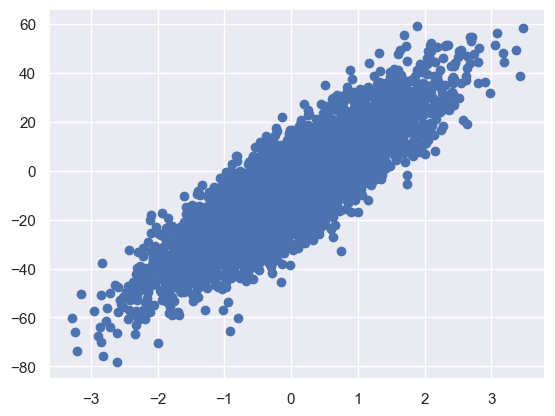

In [57]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Ejemplo
n_samples_train, n_samples_test, n_features = 4000, 1000, 1

X, y, coef = make_regression(
    n_samples=n_samples_train + n_samples_test,
    n_features=n_features,
    n_informative=1,
    shuffle=False,
    noise=10.0,
    coef=True,
    bias = -7,
    random_state = 2022
)

plt.scatter(X,y);
print(coef)

Esto nos crea un dataset donde con la cantidad de muestras solicitadas, la cantidad de features, pudiendo controlar el ruido que se utiliza para generar estas instancias. Vamos a utilizar este dataset para evaluar nuestros modelos de regresión, aprovechando que sabemos el *coeficiente* que se utilizó para generar los datos.

## Ejercicio 1 - Toy Dataset

A partir del X e y creados anteriormente, seleccione los últimos 1000 datos para el conjunto de testeo y los primeros 4000 para entrenamiento. Ajuste un modelo lineal con intercept y reporte el *error cuadrático* tanto en entrenamiento como en test. Reporten el error cuadrático en test.

In [32]:
X, y

(array([[-5.27899086e-04],
        [-2.74901425e-01],
        [-1.39285562e-01],
        ...,
        [-4.23277818e-01],
        [-1.33847954e+00],
        [ 8.33950690e-01]]),
 array([ -4.4224816 , -20.51873573, -27.3476521 , ...,  -6.20695342,
        -23.73232568,  18.68387328]))

In [59]:
# Completar
X_test = X[-1000:, :]
y_test = y[-1000:]
X_train = X[:4000, :]
y_train = y[:4000]

modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

metric_test = mean_squared_error(y_test, modelo.predict(X_test))
print(f"Métrica de test: {metric_test}")

Métrica de test: 100.95065669009462


¿Qué tan parecidos quedaron los coeficientes de nuestro modelo en comparación de los que se usaron para generar nuestro dataset?

In [61]:
# Completar
modelo.coef_, modelo.intercept_

(array([17.63217468]), -7.049825469975118)

Graficar los datos junto a nuestro modelo. 

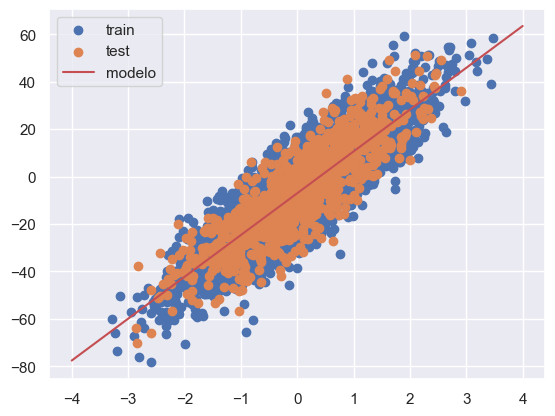

In [65]:
# Completar

# para graficar la recta
xfit = np.linspace(-4, 4, 1000)
# -1 para las cantidad filas indica que sea igual a la cantidad de elementos originales, y 1 en las columnas indica que será una sola columna
yfit = modelo.predict(xfit.reshape(-1, 1)) 
# yfit = modelo.intercept_ + modelo.coef_ * xfit

plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')
plt.plot(xfit, yfit, 'r', label = 'modelo');
plt.legend();

## Ejercicio 2 - Comparando nuestros modelos con $R^2$

$R^2$ es una métrica que nos permite evaluar cuanta variabilidad del conjunto original de datos camptura nuestro modelo. Se lo conoce también como el [*coeficiente de determinación*](https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n), y sklearn tiene su [implementación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score). A diferencia del ECM, no se trata de una función de error, que mide que tan lejos esta nuestro modelo de los datos reales (errores más chicos es mejor), sino de un *score* o puntaje, es decir que más grande es mejor y lo máximo que pude valer es 1.

$ R^2 = 1 - \frac{\text{variación no explicada}}{\text{variación total}} = 1 - \dfrac{(\sum y_i - \hat{y}_i)^2}{(\sum y_i - \bar{y})^2}$


Calcular el valor de $R^2$ para nuestro modelo:

In [66]:
from sklearn.metrics import r2_score

# Completar
r2 = r2_score(y_test, modelo.predict(X_test))
print(r2)

0.7512307345798899


## Ejercicio 3 - Efecto del conjunto de entrenamiento: Learning Curves

Muchas veces escucharemos aseverar que tener más datos es mejor, pero eso no es necesariamente cierto. Para ver si nuestro modelo necesita mas datos para mejorar su rendimiento podemos armar lo que se conoce como *curvas de aprendizaje* o *Learning curves*.

Básicamente lo que haremos es empezar de un conjunto de entrenamiento muy pequeño e iremos incrementando la cantidad de datos del mismo, para ver si el rendimiento de cada modelo mejor o no al incorporar más datos. Scikit Learn nos provee una [función](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) para hacerlo, sin embargo vamos a hacer algo similar pero de manera manual.

Completar el código siguiente para calcular un modelo para cada subconjunto de entrenamiento considerado, en el cual nos iremos quedando con distintos porcentajes de entrenamiento desde el 5% al 100%. Guardarse los $R^2$ en entrenamiento y testeo para cada modelo y finalmente realizar un gráfico donde veamos el error en función del porcentaje total de datos usado.

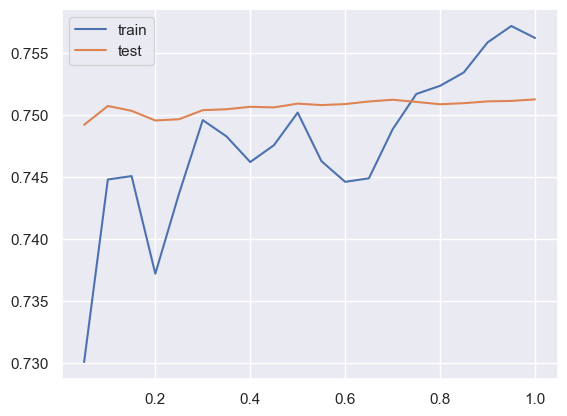

In [67]:
# Completar - 

train_errs = []
test_errs  = []
n = X_train.shape[0]

for perc in np.linspace(0.05,1,20):
  
  X_train_aux = X_train[:int(n*perc),:]
  y_train_aux = y_train[:int(n*perc)]
  modelo = LinearRegression(fit_intercept=True)
  modelo.fit(X_train_aux, y_train_aux)
  # guardo scores en train
  train_errs.append(r2_score(y_train_aux, modelo.predict(X_train_aux)))
  # guardo scores en test
  test_errs.append(r2_score(y_test, modelo.predict(X_test)))


plt.plot(np.linspace(0.05,1,20), train_errs)
plt.plot(np.linspace(0.05,1,20), test_errs)
plt.legend(['train', 'test']);

Vemos finalmente que nuestro modelo mejora con más datos de entrenamiento su rendimiento en entrenamiento, como era esperable. Sin embargo, satura rapidamente el rendimiento en test.

*Aclaración*: Lo que acabamos de hacer no es exactamente una curva de aprendizaje, ya que deberiamos, para cada percentil, poder ajustar muchos conjuntos aleatorio con esa cantida de casos. Esto al menos nos garantizará poder estimar los desvíos para poder tener mayor rigurosidad estadística.

Para más detalles analizar este [ejemplo](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html).